<a href="https://colab.research.google.com/github/rexbrandy/Neural_Networks/blob/main/FashionMNIST_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fashion MNIST Classifier

### Import everything and define train and test sets/loaders

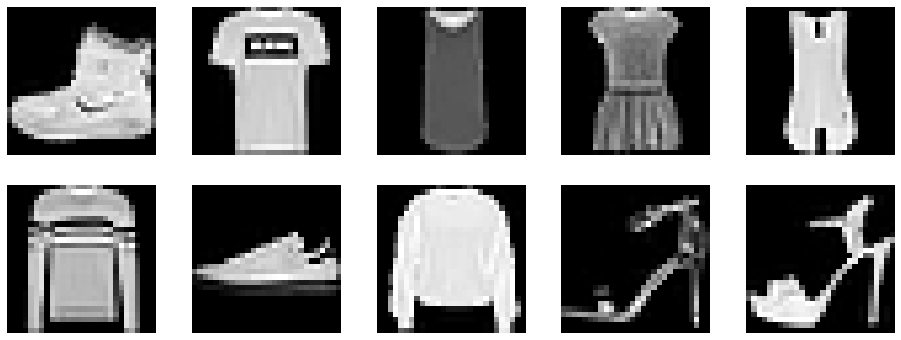

In [12]:
import matplotlib.pyplot as plt

import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets


assert torch.cuda.is_available(), "GPU is not enabled"

# use gpu if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Declare the transform
transform = transforms.Compose(
    [transforms.ToTensor(), # Transform image to tensor
     transforms.Normalize((0.5,),(0.5,))] # Normalize data
)

# Declare training and testing sets
train_set = datasets.FashionMNIST('data',
  download=True,
  train=True,
  transform=transform
)
test_set = datasets.FashionMNIST('data',
  download=True,
  train=False,
  transform=transform
)

# Declare dataloaders
train_loader = torch.utils.data.DataLoader(train_set, batch_size=64,
                                           shuffle=True, num_workers=1)

test_loader = torch.utils.data.DataLoader(test_set, batch_size=64,
                                           shuffle=True, num_workers=1)

# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
           'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')


# Here we can see the images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image = train_set.data[i,...]
    plt.imshow(image.squeeze().numpy(), cmap="gray")
    plt.axis('off');

  

### Define our classifier

In [14]:
import torch.nn as nn
import torch.nn.functional as F

class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 256) # Input layer should be 784 because images are 28x28 - one for every feature (pixel)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10) # we have 10 classes so output should be one of those

    def forward(self, x):
        # make sure input is flat
        x = x.view(x.shape[0], -1)

        # for every layer we should activate output with ReLU
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.log_softmax(self.fc4(x), dim=1)

        return x
        

### Define loss function and optimizer 

In [24]:
import torch.optim as optim

# Create model instance
model = Classifier()
model.cuda()# Move to GPU

# Define metric for loss function
criterion = nn.NLLLoss()

# Select optimizer and pass learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Here we change the initial weights+bias in each layer
initialize_parameters(model)

fc1.weight Parameter containing:
tensor([[-0.0004, -0.0183,  0.0160,  ..., -0.0060,  0.0301, -0.0212],
        [ 0.0347,  0.0110,  0.0112,  ...,  0.0291, -0.0186,  0.0065],
        [ 0.0185, -0.0173, -0.0162,  ..., -0.0004, -0.0190, -0.0167],
        ...,
        [-0.0195, -0.0226,  0.0213,  ...,  0.0273, -0.0343,  0.0177],
        [-0.0233,  0.0010, -0.0072,  ...,  0.0046, -0.0339, -0.0240],
        [-0.0090, -0.0145,  0.0077,  ..., -0.0048, -0.0250, -0.0251]],
       device='cuda:0', requires_grad=True)
fc1.bias Parameter containing:
tensor([-8.5507e-03,  3.7329e-03, -2.1527e-02, -3.0907e-02, -1.8196e-02,
        -7.6258e-03,  2.3123e-02, -1.1583e-02,  3.0216e-02,  1.8245e-02,
         2.1883e-02,  1.9428e-02,  2.7239e-02, -1.1056e-02,  3.2945e-02,
         2.8459e-02,  8.6563e-03, -2.5775e-02, -2.5715e-02, -2.5804e-02,
         1.9090e-02,  2.7990e-02, -1.8090e-02, -2.2562e-02,  1.3577e-02,
         2.0902e-02,  5.4957e-03,  1.1067e-02,  7.4495e-03,  3.9663e-03,
        -1.3683e-02,

### Test gradient computation

In [ ]:
images, labels = next(iter(train_loader))
log_ps = model(images.cuda())
loss = criterion(log_ps, labels.cuda())

loss.backward()

print(model.fc2.weight.grad)

init params

In [ ]:
for name, w in model.named_parameters():
        print(name, w)

In [22]:
def initialize_parameters(model):
    for name, w in model.named_parameters():
        print(name, w)
        if "weight" in name:
            nn.init.eye_(w)
        
        if "bias" in name:
            nn.init.zeros_(w)   

### Training Loop


In [25]:
epochs = 10
for e in range(epochs):
    # Training
    total_loss = 0
    
    model.train() # Turn on training mode

    for images, labesl in train_loader:
        optimizer.zero_grad() # Zero gradients to start off loop

        # Forward pass
        output = model(images.cuda())
        loss = criterion(output, labels.cuda())

        # Backward pass // calc derivatvies 
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    else:
        print(f'Training loss: {total_loss / 1000}', end=' ')

    # Evaluation
    model.eval()
    with torch.no_grad():
        total = 0
        correct = 0
        for images, labels in test_loader:
            output = model(images.cuda())

            mx_index = torch.argmax(output, dim=1)
            total += labels.numel()
            correct += sum(mx_index == labels.cuda()).item()
        print(f'Test Accuracy {correct / total * 100:.2f}')



ValueError: ignored

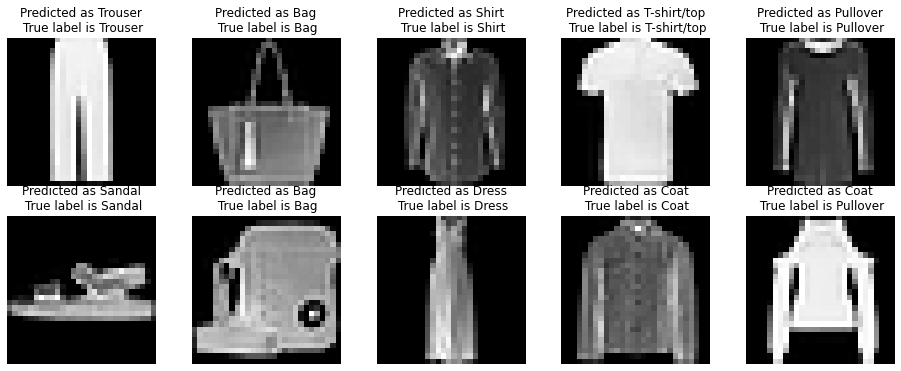

In [19]:
with torch.no_grad():

    data, target = next(iter(test_loader))
    data, target = data.to(device), target.to(device)

    data = data.view(-1, 28*28)
    output = model(data)
    predictions = np.argmax(output.cpu().numpy(), axis=1).tolist()
    true = target.cpu().numpy().tolist()
      
    plt.figure(figsize=(16, 6))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        image = data[i,...].cpu().numpy().reshape((28,28))
        plt.imshow(image, cmap="gray")
        plt.axis('off')
        plt.title('Predicted as {}\n True label is {}'.format(test_set.classes[predictions[i]], test_set.classes[true[i]], ))